In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

%matplotlib inline

In [2]:
df = pd.read_csv('H:/Datasets/Python Projects/Netflix_new/titles.csv')

In [3]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [4]:
df.groupby('type').count()

,id,title,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
type,,,,,,,,,,,,,,
MOVIE,3744,3743,3735,3744,1380,3744,3744,3744,0,3482,3429,3413,3682,3549
SHOW,2106,2106,2097,2106,1851,2106,2106,2106,2106,1965,1939,1939,2077,1990


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [6]:
df.shape

(5850, 15)

In [7]:
df.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [8]:
list_col = ['type', 'age_certification', 'genres', 'production_countries']

for col in list_col:
    print(' {} : {} ' . format(col.upper(), df[col].unique()))

 TYPE : ['SHOW' 'MOVIE'] 
 AGE_CERTIFICATION : ['TV-MA' 'R' 'PG' nan 'TV-14' 'PG-13' 'TV-PG' 'TV-Y' 'TV-G' 'TV-Y7' 'G'
 'NC-17'] 
 GENRES : ["['documentation']" "['drama', 'crime']"
 "['drama', 'action', 'thriller', 'european']" ...
 "['drama', 'animation', 'music']" "['animation', 'family', 'scifi']"
 "['documentation', 'music', 'reality']"] 
 PRODUCTION_COUNTRIES : ["['US']" "['GB']" "['GB', 'US']" "['EG']" "['DE']" "['IN']"
 "['SU', 'IN']" "['LB', 'CA', 'FR']" '[]' "['LB']" "['DZ', 'EG']"
 "['CA', 'FR', 'LB']" "['US', 'GB']" "['US', 'IT']" "['JP']" "['AR']"
 "['FR', 'EG']" "['FR', 'LB']" "['CA', 'US']" "['US', 'FR']"
 "['JP', 'US']" "['US', 'CA']" "['DE', 'US']" "['PE', 'US', 'BR']"
 "['IT', 'US', 'FR']" "['IE', 'GB', 'DE', 'FR']" "['HK', 'US']" "['AU']"
 "['FR']" "['DE', 'GH', 'GB', 'US', 'BF']" "['MX']" "['ES', 'AR']"
 "['CO']" "['PS', 'US', 'FR', 'DE']" "['FR', 'NO', 'LB', 'BE']"
 "['BE', 'FR', 'IT', 'LB']" "['TR']" "['IN', 'SU']" "['DK']" "['CA']"
 "['DE', 'GB', 'US', 'BS', 'CZ'

In [9]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


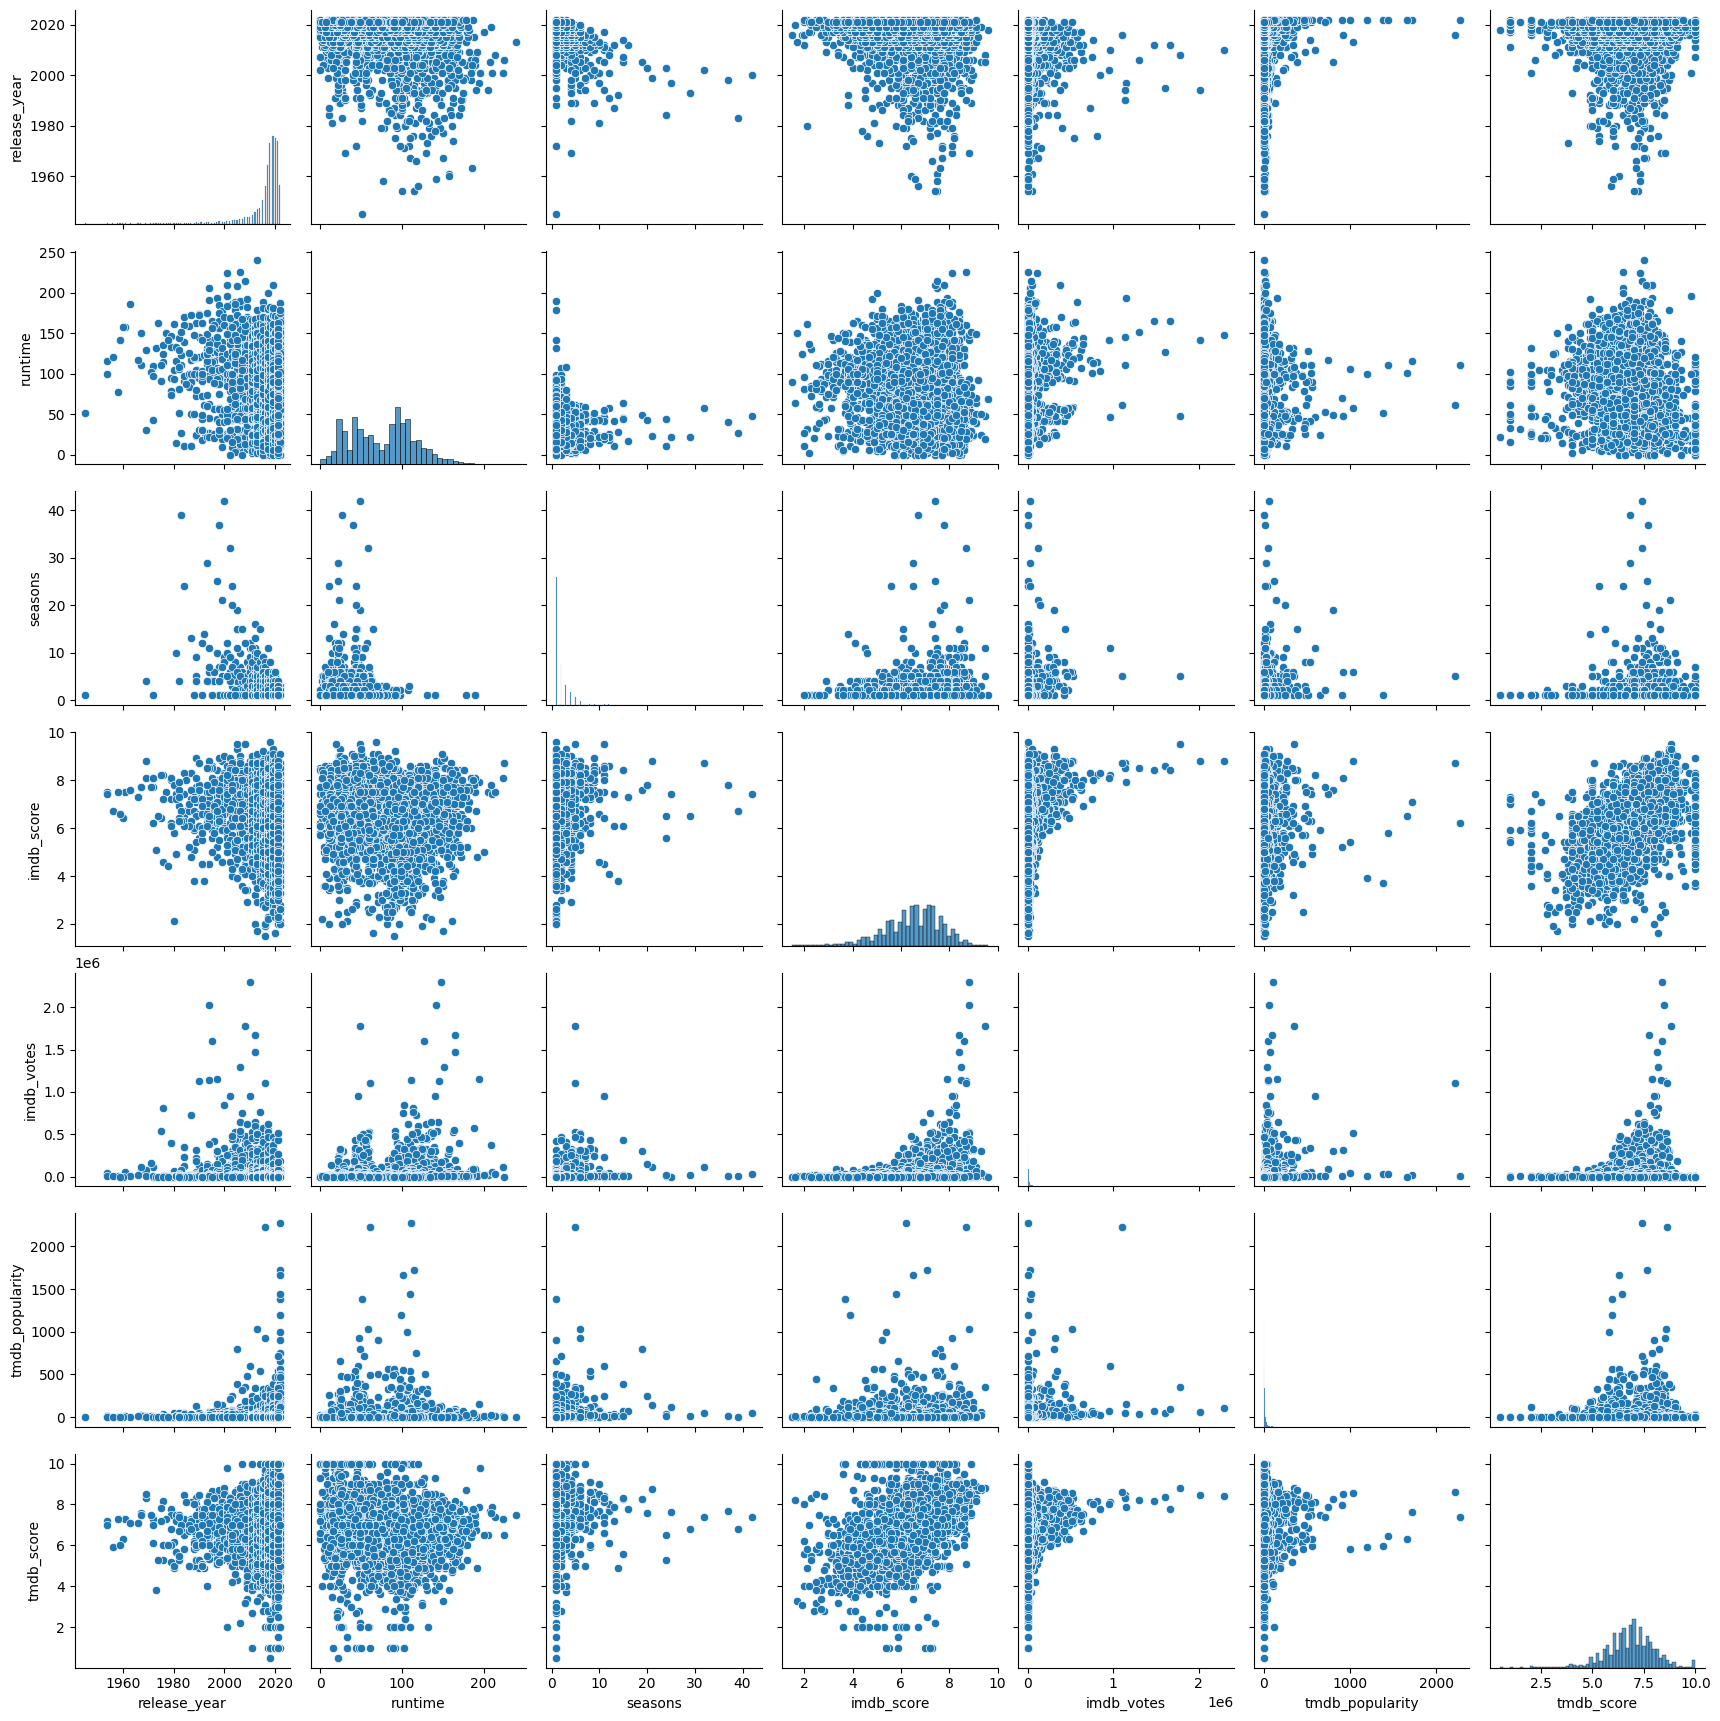

In [10]:
sns.pairplot(df)

In [11]:
df['production_countries'] = df['production_countries'].apply(lambda k : k.strip("[']")).apply(lambda k : k.replace("'",""))

In [12]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],US,1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",US,NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",US,NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",GB,NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","GB, US",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [13]:
countries = df.groupby('production_countries').size().reset_index().sort_values(by = 0,ascending = 0).reset_index().drop('index',axis = 1).rename(columns = {0:'counts'})

countries['production_countries'].replace("", "Unknown", inplace=True)
countries.head(10)

,production_countries,counts
0,US,1959
1,IN,599
2,JP,264
3,Unknown,229
4,KR,222
5,GB,218
6,ES,161
7,FR,125
8,CA,107
9,MX,98


In [14]:
unk = ['Unknown']

countries = countries[countries.production_countries.isin(unk) == False]

C:\Users\pc\AppData\Local\Temp\ipykernel_9772\1726410506.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax = sns.barplot(x=countries.production_countries[:10], y = countries.counts[:10])


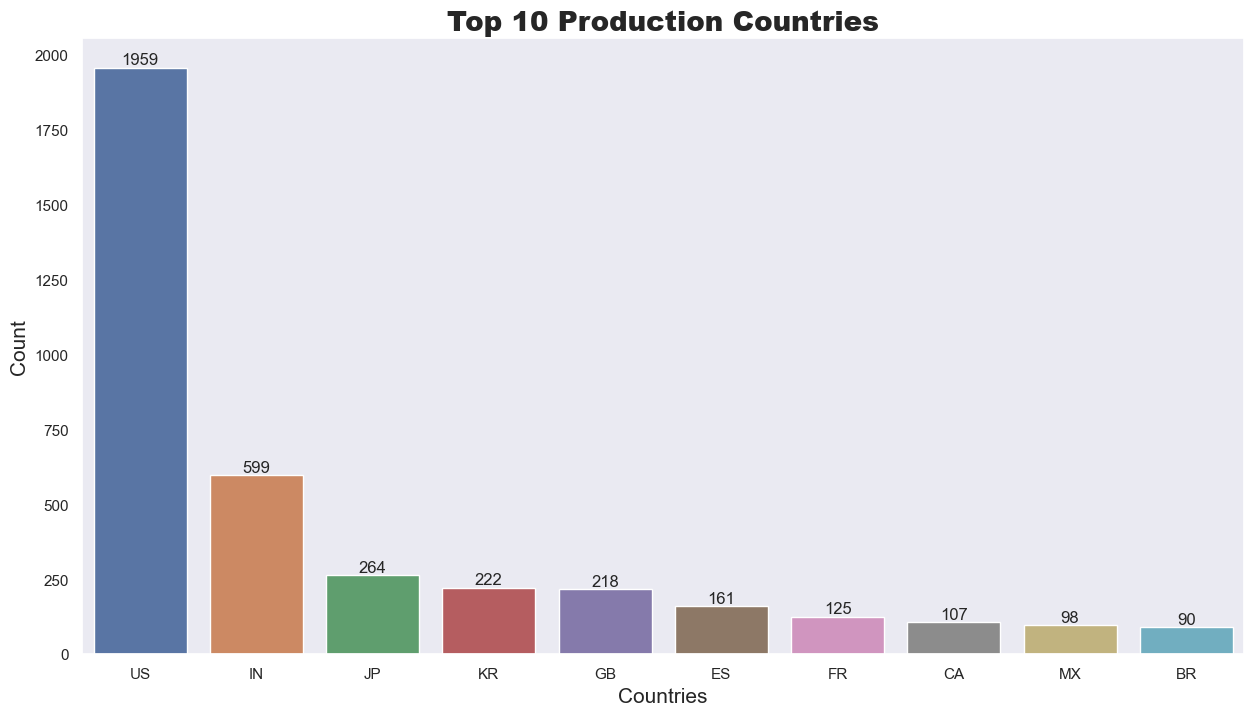

In [15]:
plt.figure(figsize=[15,8])
sns.set_theme(style='dark')
ax = sns.barplot(x=countries.production_countries[:10], y = countries.counts[:10])
plt.title("Top 10 Production Countries", weight='heavy', size = 20)
plt.xlabel("Countries", size=15)
plt.ylabel("Count", size=15)

ax.bar_label(ax.containers[0])
plt.show()

In [16]:
years = df.groupby('release_year').size().reset_index().sort_values(by = 0,ascending = 0).reset_index().drop('index',axis = 1).rename(columns = {0:'counts'})
years

,release_year,counts
0,2019,836
1,2020,814
2,2021,787
3,2018,773
4,2017,563
...,...,...
58,1973,1
59,1974,1
60,1977,1
61,1985,1


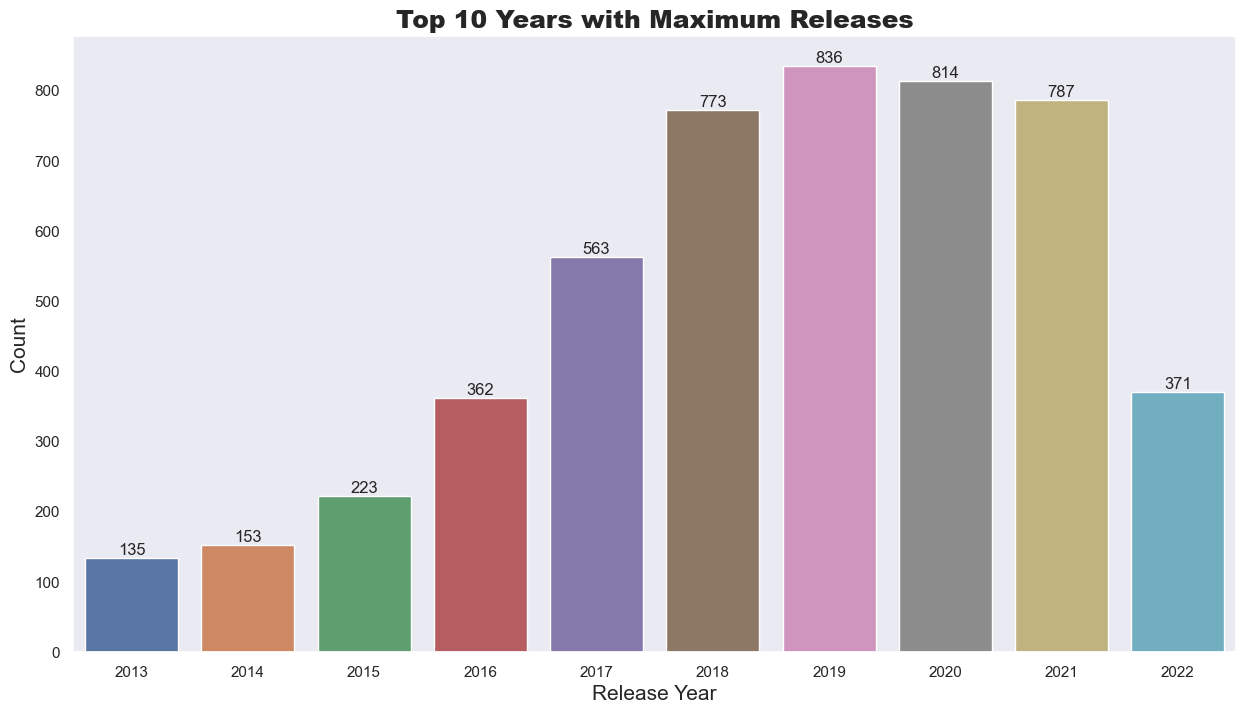

In [17]:
plt.figure(figsize=[15,8])
sns.set_theme(style='dark')
plt.title("Top 10 Years with Maximum Releases", weight='heavy', size=18)
ax = sns.barplot(x = years.release_year[:10], y = years.counts)
plt.xlabel("Release Year", size=15)
plt.ylabel("Count", size=15)
ax.bar_label(ax.containers[0])
plt.show()

In [18]:
def normalize(s):
    s = s.lower()
    s = s.title()
    s = ' '.join(s.split())
    return s

In [19]:
df['genres'] = df['genres'].apply(literal_eval)

In [20]:
df = df.explode('genres').drop_duplicates()
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,documentation,US,1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,drama,US,NaN,tt0075314,8.2,808582.0,40.965,8.179
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,crime,US,NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,drama,US,NaN,tt0068473,7.7,107673.0,10.010,7.300
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,action,US,NaN,tt0068473,7.7,107673.0,10.010,7.300


In [21]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,documentation,US,1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,drama,US,NaN,tt0075314,8.2,808582.0,40.965,8.179
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,crime,US,NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,drama,US,NaN,tt0068473,7.7,107673.0,10.010,7.300
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,action,US,NaN,tt0068473,7.7,107673.0,10.010,7.300


In [22]:
genres = df.groupby('genres').size().reset_index().sort_values(by = 0,ascending = 0).reset_index().drop('index',axis = 1).rename(columns = {0:'counts'}).head(10)
genres

,genres,counts
0,drama,2968
1,comedy,2325
2,thriller,1228
3,action,1157
4,romance,971
5,documentation,952
6,crime,936
7,animation,705
8,family,682
9,fantasy,630


In [23]:
df.explode('genres', ignore_index=False)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,documentation,US,1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,drama,US,NaN,tt0075314,8.2,808582.0,40.965,8.179
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,crime,US,NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,drama,US,NaN,tt0068473,7.7,107673.0,10.010,7.300
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,action,US,NaN,tt0068473,7.7,107673.0,10.010,7.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,comedy,CO,NaN,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,NaN,US,NaN,NaN,NaN,NaN,1.296,10.000
5849,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021,NaN,7,family,,1.0,tt13711094,7.8,18.0,2.289,10.000
5849,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021,NaN,7,animation,,1.0,tt13711094,7.8,18.0,2.289,10.000


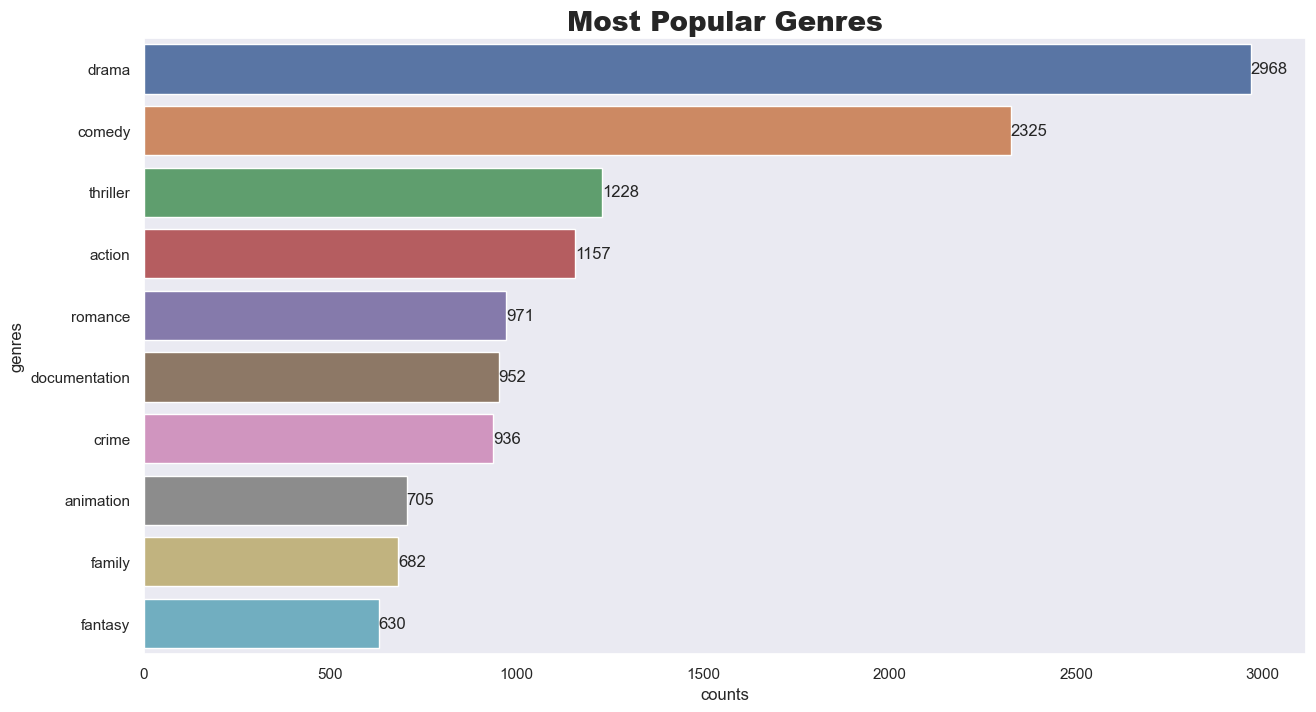

In [24]:
plt.figure(figsize=[15,8])
sns.set_theme(style='dark')
plt.title("Most Popular Genres", weight='heavy', size=20)

ax = sns.barplot(x=genres.counts, y=genres.genres, data=genres, orient='h')

ax.bar_label(ax.containers[0])
plt.show()

In [25]:
df['imdb_score'].max()

9.6

In [26]:
imdb = df.groupby('imdb_score').count().sort_values(by='imdb_score', ascending=False)
imdb.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_votes,tmdb_popularity,tmdb_score
imdb_score,,,,,,,,,,,,,,
9.6,1,1,1,1,1,1,1,0,1,1,1,1,0,0
9.5,4,4,4,4,4,4,4,4,4,4,4,4,3,3
9.3,6,6,6,6,6,6,6,6,6,6,6,6,6,6
9.2,4,4,4,4,4,4,4,4,4,4,4,4,4,4
9.1,10,10,10,10,10,8,10,10,10,7,10,10,10,9
9.0,25,25,25,25,25,25,25,25,25,25,25,25,25,25
8.9,18,18,18,18,18,15,18,18,18,16,18,18,18,18
8.8,47,47,47,47,47,45,47,47,47,41,47,47,47,47
8.7,74,74,74,74,74,66,74,74,74,61,74,74,73,73


In [27]:
df['age_certification'].unique()

array(['TV-MA', 'R', 'PG', nan, 'TV-14', 'PG-13', 'TV-PG', 'TV-Y', 'TV-G',
       'TV-Y7', 'G', 'NC-17'], dtype=object)

In [28]:
certification = df.groupby('age_certification').count().sort_values(by='id', ascending=False)
certification

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
age_certification,,,,,,,,,,,,,,
TV-MA,2413,2413,2413,2413,2413,2413,2408,2413,2413,2337,2324,2324,2406,2378
R,1571,1571,1571,1571,1571,1571,1568,1571,0,1528,1525,1523,1571,1566
TV-14,1335,1335,1335,1331,1335,1335,1331,1335,1335,1291,1283,1283,1319,1276
PG-13,1260,1260,1260,1260,1260,1260,1259,1260,0,1239,1233,1223,1259,1253
PG,765,765,765,764,765,765,765,765,0,752,746,742,763,757
TV-Y7,549,549,549,546,549,549,547,549,549,532,532,532,545,525
TV-PG,468,468,468,466,468,468,463,468,468,452,447,447,458,443
TV-Y,324,324,324,322,324,324,321,324,324,316,315,315,318,298
G,306,306,306,306,306,306,303,306,0,265,258,258,298,285


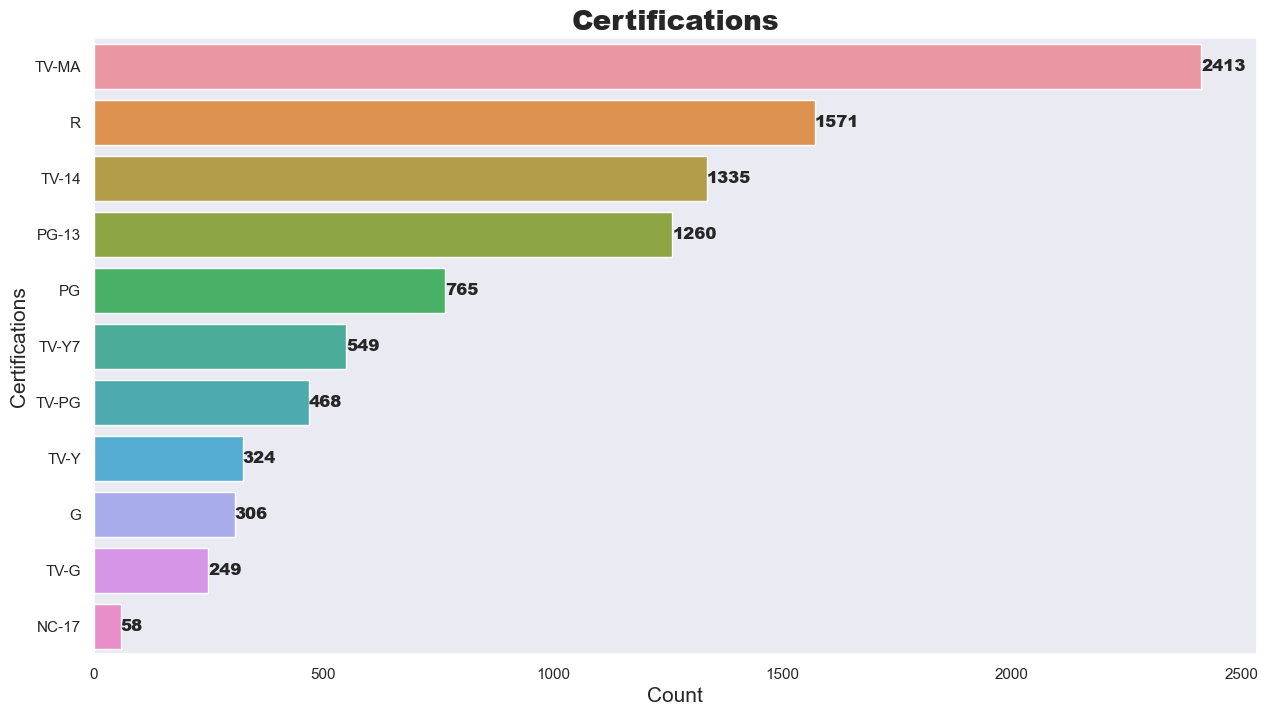

In [29]:
plt.figure(figsize=[15,8])
sns.set_theme(style='dark')
plt.title("Certifications", weight='heavy', size=20)

ax = sns.barplot(x = certification.id, y = certification.index, data=certification)
plt.xlabel("Count", size=15)
plt.ylabel("Certifications", size=15)

ax.bar_label(ax.containers[0], size=12, weight='heavy')
plt.show()

In [30]:
best_movie = df[df['type'] == "MOVIE"]
best_movie = best_movie[best_movie['tmdb_score'] == best_movie['tmdb_score'].max()]
best_movie

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1613,tm811691,Thomas & Friends: Full Steam To The Rescue!,MOVIE,Full Steam to the Rescue! is a UK DVD featurin...,2016,NaN,93,family,GB,NaN,NaN,NaN,NaN,0.957,10.0
2813,tm1073482,Motu Patlu Kung Fu Kings 4 The Challenge of Ku...,MOVIE,"While in Japan, best friends Motu and Patlu ha...",2018,G,86,NaN,,NaN,NaN,NaN,NaN,1.133,10.0
2935,tm445852,Three Words to Forever,MOVIE,Three generations of a family get together for...,2018,NaN,106,drama,XX,NaN,tt9248252,6.8,110.0,2.040,10.0
2935,tm445852,Three Words to Forever,MOVIE,Three generations of a family get together for...,2018,NaN,106,family,XX,NaN,tt9248252,6.8,110.0,2.040,10.0
2935,tm445852,Three Words to Forever,MOVIE,Three generations of a family get together for...,2018,NaN,106,comedy,XX,NaN,tt9248252,6.8,110.0,2.040,10.0
2935,tm445852,Three Words to Forever,MOVIE,Three generations of a family get together for...,2018,NaN,106,romance,XX,NaN,tt9248252,6.8,110.0,2.040,10.0
4004,tm977464,Youth v Gov,MOVIE,How can we bring accountability over the clima...,2020,NaN,110,documentation,,NaN,tt13192640,6.7,70.0,1.841,10.0
4057,tm945435,Octonauts and the Great Barrier Reef,MOVIE,"In this musical special, the Octonauts must fi...",2020,NaN,47,animation,XX,NaN,tt13150606,6.5,141.0,4.123,10.0
4057,tm945435,Octonauts and the Great Barrier Reef,MOVIE,"In this musical special, the Octonauts must fi...",2020,NaN,47,action,XX,NaN,tt13150606,6.5,141.0,4.123,10.0
4057,tm945435,Octonauts and the Great Barrier Reef,MOVIE,"In this musical special, the Octonauts must fi...",2020,NaN,47,comedy,XX,NaN,tt13150606,6.5,141.0,4.123,10.0


In [31]:
best_show = df[df['type'] == 'SHOW']
best_show = best_show[best_show['imdb_score'] == best_show['imdb_score'].max()]
best_show

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2658,ts265844,#ABtalks,SHOW,#ABtalks is a YouTube interview show hosted by...,2018,TV-PG,68,NaN,,1.0,tt12635254,9.6,7.0,NaN,NaN


In [32]:
bins = [0, 30, 60, 120, 180, 240]
labels = ["< 30 mins", "< an hour", "between 1 to 2 hour", "between 2 to 3 hour", "more than 3 hour"]

df['runtime_slab'] = pd.cut(df['runtime'], bins=bins, labels=labels, right=False)

In [33]:
show = df[df['type']=='SHOW']

In [34]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,runtime_slab
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,documentation,US,1.0,NaN,NaN,NaN,0.600,NaN,< an hour
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,drama,US,NaN,tt0075314,8.2,808582.0,40.965,8.179,between 1 to 2 hour
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,crime,US,NaN,tt0075314,8.2,808582.0,40.965,8.179,between 1 to 2 hour
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,drama,US,NaN,tt0068473,7.7,107673.0,10.010,7.300,between 1 to 2 hour
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,action,US,NaN,tt0068473,7.7,107673.0,10.010,7.300,between 1 to 2 hour


In [35]:
df[df['runtime'] == 0]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,runtime_slab
518,ts204466,Pecados capitales,SHOW,Evaristo Salinas is a successful businessman i...,2002,TV-MA,0,romance,CO,1.0,tt0355119,8.5,195.0,1.791,NaN,< 30 mins
518,ts204466,Pecados capitales,SHOW,Evaristo Salinas is a successful businessman i...,2002,TV-MA,0,comedy,CO,1.0,tt0355119,8.5,195.0,1.791,NaN,< 30 mins
518,ts204466,Pecados capitales,SHOW,Evaristo Salinas is a successful businessman i...,2002,TV-MA,0,drama,CO,1.0,tt0355119,8.5,195.0,1.791,NaN,< 30 mins
594,ts188031,Pink Zone,SHOW,"Is the story of four friends: Natalia, Angélic...",2007,NaN,0,drama,MX,1.0,tt11194518,5.8,52.0,0.682,10.0,< 30 mins
594,ts188031,Pink Zone,SHOW,"Is the story of four friends: Natalia, Angélic...",2007,NaN,0,romance,MX,1.0,tt11194518,5.8,52.0,0.682,10.0,< 30 mins
594,ts188031,Pink Zone,SHOW,"Is the story of four friends: Natalia, Angélic...",2007,NaN,0,comedy,MX,1.0,tt11194518,5.8,52.0,0.682,10.0,< 30 mins
1340,ts56032,La Niña,SHOW,A young woman who was part of the guerrilla fo...,2016,TV-MA,0,action,CO,1.0,tt5677942,8.4,649.0,23.759,7.7,< 30 mins
1340,ts56032,La Niña,SHOW,A young woman who was part of the guerrilla fo...,2016,TV-MA,0,drama,CO,1.0,tt5677942,8.4,649.0,23.759,7.7,< 30 mins
1430,ts87884,Sons of the Caliphate,SHOW,This is a drama series about the lives of thre...,2015,TV-14,0,drama,NG,1.0,tt10202268,7.4,33.0,1.347,NaN,< 30 mins
2577,ts81856,Borges,SHOW,Four employees of an import company discover t...,2018,TV-MA,0,comedy,BR,2.0,tt7895652,6.2,172.0,1.415,7.8,< 30 mins


In [36]:
df['runtime'] = df['runtime'].replace(0, df['runtime'].mean(), inplace=True)

In [37]:
runtime = df.groupby('runtime_slab').count().sort_values(by='id', ascending=False)
runtime

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
runtime_slab,,,,,,,,,,,,,,,
between 1 to 2 hour,7049,7049,7049,7042,7049,3246,0,7033,7049,626,6834,6781,6772,6971,6809
< an hour,3213,3213,3213,3208,3213,2667,0,3189,3213,2832,3020,2978,2972,3179,3080
< 30 mins,2685,2684,2685,2675,2685,2334,0,2666,2685,2449,2515,2492,2483,2665,2580
between 2 to 3 hour,2108,2108,2108,2108,2108,981,0,2108,2108,15,2071,2066,2066,2088,2055
more than 3 hour,89,89,89,89,89,67,0,89,89,1,82,82,82,89,87


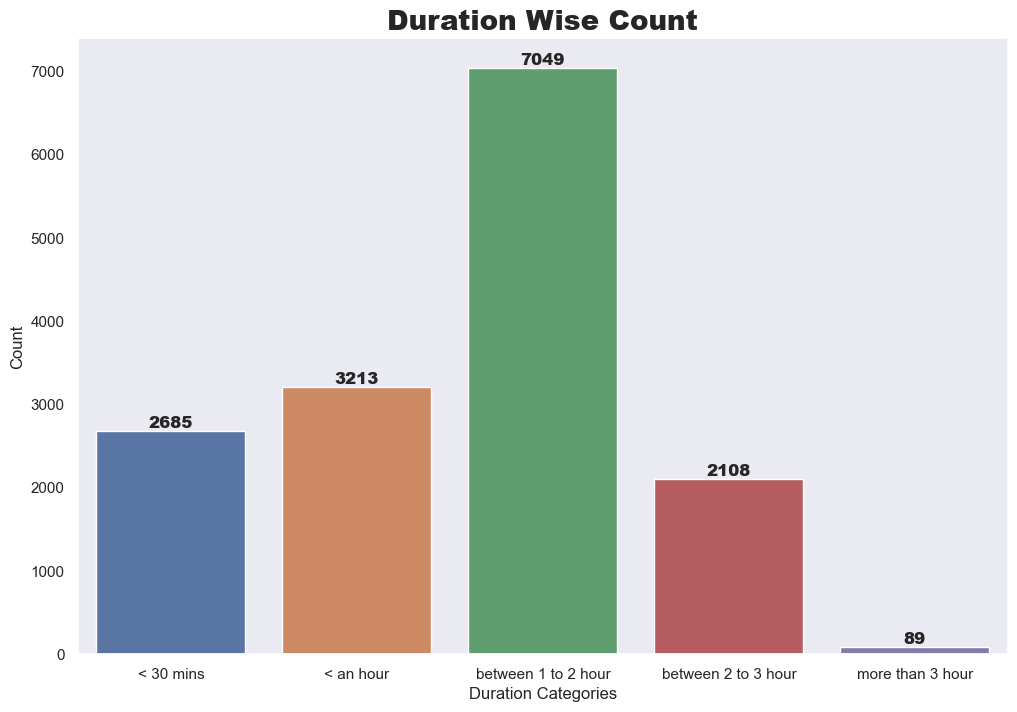

In [38]:
plt.figure(figsize=[12,8])
sns.set_theme(style='dark')
plt.title("Duration Wise Count", weight='heavy', size=20)

ax = sns.barplot(x=runtime.index, y='id', data=runtime)
plt.xlabel("Duration Categories")
plt.ylabel("Count")
ax.bar_label(ax.containers[0], size=12, weight='heavy')
plt.show()

In [39]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,runtime_slab
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,None,documentation,US,1.0,NaN,NaN,NaN,0.600,NaN,< an hour
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,None,drama,US,NaN,tt0075314,8.2,808582.0,40.965,8.179,between 1 to 2 hour
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,None,crime,US,NaN,tt0075314,8.2,808582.0,40.965,8.179,between 1 to 2 hour
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,None,drama,US,NaN,tt0068473,7.7,107673.0,10.010,7.300,between 1 to 2 hour
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,None,action,US,NaN,tt0068473,7.7,107673.0,10.010,7.300,between 1 to 2 hour


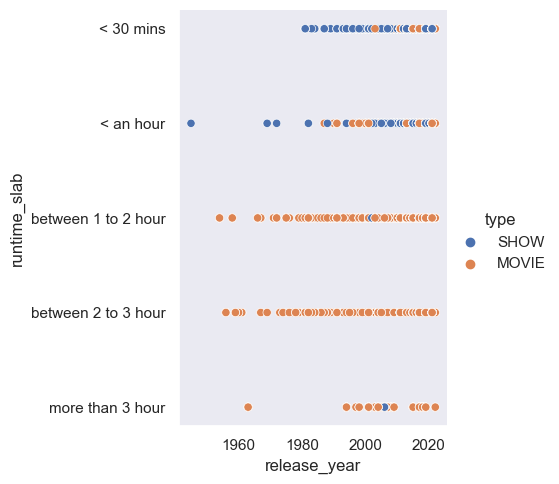

In [40]:
sns.relplot(x='release_year', y = 'runtime_slab', hue='type', data=df)

In [41]:
df['imdb_votes'].max()

2294231.0

In [42]:
df[df['imdb_votes'] == df['imdb_votes'].max()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,runtime_slab
237,tm92641,Inception,MOVIE,"Cobb, a skilled thief who commits corporate es...",2010,PG-13,None,action,"US, GB",NaN,tt1375666,8.8,2294231.0,108.284,8.4,between 2 to 3 hour
237,tm92641,Inception,MOVIE,"Cobb, a skilled thief who commits corporate es...",2010,PG-13,None,scifi,"US, GB",NaN,tt1375666,8.8,2294231.0,108.284,8.4,between 2 to 3 hour
237,tm92641,Inception,MOVIE,"Cobb, a skilled thief who commits corporate es...",2010,PG-13,None,music,"US, GB",NaN,tt1375666,8.8,2294231.0,108.284,8.4,between 2 to 3 hour
237,tm92641,Inception,MOVIE,"Cobb, a skilled thief who commits corporate es...",2010,PG-13,None,thriller,"US, GB",NaN,tt1375666,8.8,2294231.0,108.284,8.4,between 2 to 3 hour


In [43]:
show[show['imdb_votes'] == show['imdb_votes'].max()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,runtime_slab
216,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,drama,US,5.0,tt0903747,9.5,1775990.0,353.848,8.79,< an hour
216,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,crime,US,5.0,tt0903747,9.5,1775990.0,353.848,8.79,< an hour
216,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,thriller,US,5.0,tt0903747,9.5,1775990.0,353.848,8.79,< an hour


In [44]:
india_df = df[df['production_countries'] == "IN"]
india_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,runtime_slab
19,tm94651,Dostana,MOVIE,Two close friends decide to enter law enforcem...,1980,NaN,None,drama,IN,NaN,tt0080653,2.1,25.0,3.980,4.9,between 2 to 3 hour
19,tm94651,Dostana,MOVIE,Two close friends decide to enter law enforcem...,1980,NaN,None,comedy,IN,NaN,tt0080653,2.1,25.0,3.980,4.9,between 2 to 3 hour
19,tm94651,Dostana,MOVIE,Two close friends decide to enter law enforcem...,1980,NaN,None,crime,IN,NaN,tt0080653,2.1,25.0,3.980,4.9,between 2 to 3 hour
19,tm94651,Dostana,MOVIE,Two close friends decide to enter law enforcem...,1980,NaN,None,romance,IN,NaN,tt0080653,2.1,25.0,3.980,4.9,between 2 to 3 hour
19,tm94651,Dostana,MOVIE,Two close friends decide to enter law enforcem...,1980,NaN,None,action,IN,NaN,tt0080653,2.1,25.0,3.980,4.9,between 2 to 3 hour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5821,tm1110241,Kaaval,MOVIE,Thampan and Antony are a long time best friend...,2021,NaN,None,thriller,IN,NaN,tt11182984,5.1,1497.0,1.978,5.3,between 2 to 3 hour
5821,tm1110241,Kaaval,MOVIE,Thampan and Antony are a long time best friend...,2021,NaN,None,action,IN,NaN,tt11182984,5.1,1497.0,1.978,5.3,between 2 to 3 hour
5821,tm1110241,Kaaval,MOVIE,Thampan and Antony are a long time best friend...,2021,NaN,None,drama,IN,NaN,tt11182984,5.1,1497.0,1.978,5.3,between 2 to 3 hour
5831,ts273317,Pitta Kathalu,SHOW,"Four different women, four journeys of love an...",2021,TV-MA,None,drama,IN,1.0,tt13878800,5.1,738.0,1.400,5.5,< an hour


In [45]:
india_df[india_df['imdb_votes'] == india_df['imdb_votes'].max()].sort_values(by='imdb_votes')

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,runtime_slab
316,tm142564,3 Idiots,MOVIE,Rascal. Joker. Dreamer. Genius... You've never...,2009,PG-13,None,drama,IN,NaN,tt1187043,8.4,390739.0,44.999,8.0,between 2 to 3 hour
316,tm142564,3 Idiots,MOVIE,Rascal. Joker. Dreamer. Genius... You've never...,2009,PG-13,None,comedy,IN,NaN,tt1187043,8.4,390739.0,44.999,8.0,between 2 to 3 hour


In [46]:
india_df.sort_values(by='imdb_votes', ascending=False).head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,runtime_slab
316,tm142564,3 Idiots,MOVIE,Rascal. Joker. Dreamer. Genius... You've never...,2009,PG-13,None,comedy,IN,NaN,tt1187043,8.4,390739.0,44.999,8.000,between 2 to 3 hour
316,tm142564,3 Idiots,MOVIE,Rascal. Joker. Dreamer. Genius... You've never...,2009,PG-13,None,drama,IN,NaN,tt1187043,8.4,390739.0,44.999,8.000,between 2 to 3 hour
372,tm83786,Like Stars on Earth,MOVIE,Ishaan Awasthi is an eight-year-old whose worl...,2007,PG,None,drama,IN,NaN,tt0986264,8.3,189685.0,17.660,8.012,between 2 to 3 hour
372,tm83786,Like Stars on Earth,MOVIE,Ishaan Awasthi is an eight-year-old whose worl...,2007,PG,None,family,IN,NaN,tt0986264,8.3,189685.0,17.660,8.012,between 2 to 3 hour
919,tm147913,PK,MOVIE,A stranger in the city asks questions no one h...,2014,PG-13,None,fantasy,IN,NaN,tt2338151,8.1,181406.0,10.001,7.700,between 2 to 3 hour
919,tm147913,PK,MOVIE,A stranger in the city asks questions no one h...,2014,PG-13,None,romance,IN,NaN,tt2338151,8.1,181406.0,10.001,7.700,between 2 to 3 hour
919,tm147913,PK,MOVIE,A stranger in the city asks questions no one h...,2014,PG-13,None,scifi,IN,NaN,tt2338151,8.1,181406.0,10.001,7.700,between 2 to 3 hour
919,tm147913,PK,MOVIE,A stranger in the city asks questions no one h...,2014,PG-13,None,comedy,IN,NaN,tt2338151,8.1,181406.0,10.001,7.700,between 2 to 3 hour
919,tm147913,PK,MOVIE,A stranger in the city asks questions no one h...,2014,PG-13,None,drama,IN,NaN,tt2338151,8.1,181406.0,10.001,7.700,between 2 to 3 hour
1173,tm137002,Bāhubali: The Beginning,MOVIE,The young Shivudu is left as a foundling in a ...,2015,NaN,None,fantasy,IN,NaN,tt2631186,8.0,120110.0,57.230,7.600,between 2 to 3 hour
